In [187]:
import pandas as pd

accidents_df = pd.read_csv('dataset/US_Accidents_Dec21_updated.csv')
accidents_copy = accidents_df.copy()

Visualization of the Dataset's information: number of rows, number of features 

In [188]:
accidents_copy.shape

(2845342, 47)

In [189]:
accidents_copy.info

<bound method DataFrame.info of                 ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0       

Drop of the irrelevant features

In [190]:
accidents_copy.drop('ID',axis=1,inplace=True)

In [191]:
accidents_copy.drop('Country',axis=1,inplace=True)
accidents_copy.drop('State',axis=1,inplace=True)
accidents_copy.drop('Wind_Direction',axis=1,inplace=True)
accidents_copy.drop('Nautical_Twilight',axis=1,inplace=True)

Regarding the features about twilights, they are different ways of considering the start of the day by different point of views:

Civil Twilight: morning civil twilight begins when the geometric center of the sun is 6 degrees below the horizon, and ends at sunrise
Nautical Twilight: Begins in the morning, or ends in the evening, when the geometric center of the sun is 12 degrees below the horizon
Astronomical Twilight: Begins in the morning, or ends in the evening, when the geometric center of the sun is 18 degrees below the horizon

The measure that is more fit to us is actually the Sunrise Sunset, which takes into account the start of the day by the rising of the sun. Therefore the Sunrise Sunset is kept while the others are dropped.

In [192]:
accidents_copy.drop('City',axis=1,inplace=True)
accidents_copy.drop('County',axis=1,inplace=True)
accidents_copy.drop('End_Time',axis=1,inplace=True)
accidents_copy.drop('Street',axis=1,inplace=True)
accidents_copy.drop('Description',axis=1,inplace=True)
accidents_copy.drop('Roundabout',axis=1,inplace=True)
accidents_copy.drop('Traffic_Calming',axis=1,inplace=True)
accidents_copy.drop('Turning_Loop',axis=1,inplace=True)
accidents_copy.drop('Astronomical_Twilight',axis=1,inplace=True)
accidents_copy.drop('Bump',axis=1,inplace=True)
accidents_copy.drop('Civil_Twilight',axis=1,inplace=True)
accidents_copy.drop('Give_Way',axis=1,inplace=True)
accidents_copy.drop('No_Exit',axis=1,inplace=True)

In [193]:
accidents_copy.drop('Timezone',axis=1,inplace=True)
accidents_copy.drop('Airport_Code',axis=1,inplace=True)

In [194]:
(accidents_copy['Severity'].values == 1).sum()

26053

Feature Extraction of 'Start_Time'

In [195]:
from datetime import datetime

def change_format(df):
    colonna_giorni = df['Start_Time']
    colonna_giorni_df = pd.DataFrame(df['Start_Time'])

    for index,row in colonna_giorni_df.iterrows():
        stringa = row[0]
        stringa = stringa.split('.')
        datetime_object = datetime.strptime(stringa[0], '%Y-%m-%d %H:%M:%S')
        colonna_giorni_df.loc[index][0] = datetime_object.weekday()
    
    df['Start_Time'] = colonna_giorni_df
    

def change_day(record):
    if record == 0:
        return str('monday')
    elif record == 1:
        return str('tuesday')
    if record == 2:
        return str('wednesday')
    elif record == 3:
        return str('thursday')
    if record == 4:
        return str('friday')
    elif record == 5:
        return str('saturday')
    if record == 6:
        return str('sunday')

temp_df = pd.DataFrame(accidents_copy['Start_Time'])
change_format(temp_df)
temp = list(map(change_day,temp_df['Start_Time']))
temp_df['Start_Time'] = temp


In [196]:
from collections import Counter

#Counter(temp_df['Start_Time'])
Counter(accidents_copy['Start_Time'])

Counter({'2016-02-08 00:37:08': 1,
         '2016-02-08 05:56:20': 1,
         '2016-02-08 06:15:39': 1,
         '2016-02-08 06:51:45': 1,
         '2016-02-08 07:53:43': 1,
         '2016-02-08 08:16:57': 1,
         '2016-02-08 08:15:41': 1,
         '2016-02-08 11:51:46': 1,
         '2016-02-08 14:19:57': 1,
         '2016-02-08 15:16:43': 1,
         '2016-02-08 15:43:50': 1,
         '2016-02-08 16:50:57': 1,
         '2016-02-08 17:27:39': 1,
         '2016-02-08 17:30:18': 1,
         '2016-02-08 18:11:11': 2,
         '2016-02-08 19:47:42': 2,
         '2016-02-08 20:13:22': 1,
         '2016-02-08 21:00:17': 1,
         '2016-02-08 21:10:10': 1,
         '2016-02-08 21:30:31': 1,
         '2016-02-09 05:54:01': 1,
         '2016-02-09 06:10:59': 1,
         '2016-02-09 06:46:32': 1,
         '2016-02-09 07:18:10': 1,
         '2016-02-09 07:28:15': 1,
         '2016-02-09 07:25:40': 1,
         '2016-02-09 07:44:49': 1,
         '2016-02-09 07:48:40': 2,
         '2016-02-09

Drop of the rows: records containing Severity index = 1 or index = 4 and the records related to the years 2021 and 2020

In [197]:
from imblearn.over_sampling._smote.base import Counter

lista_da_eliminare = []
lista_check = []
lista_weather = Counter(accidents_copy['Weather_Condition'])


for elemento in lista_weather.keys():
    if lista_weather[elemento] < 100:
        lista_check.append(elemento)

for index,row in accidents_copy.iterrows():
    indice = row['Severity']
    stringa = row['Start_Time'].split('-')
    stringa = stringa[0]
    if stringa == '2021' or stringa == '2020' or indice == 1 or indice == 4:
        lista_da_eliminare.append(index)

def change(record):
    if record == 2:
        return 0
    elif record == 3:
        return 1
    
change_format(accidents_copy)
temp = list(map(change_day,accidents_copy['Start_Time']))
accidents_copy['Start_Time'] = temp
temp_new = list(map(change,accidents_copy['Severity']))
accidents_copy['Severity'] = temp_new

accidents_copy.drop(labels=lista_da_eliminare,inplace=True)


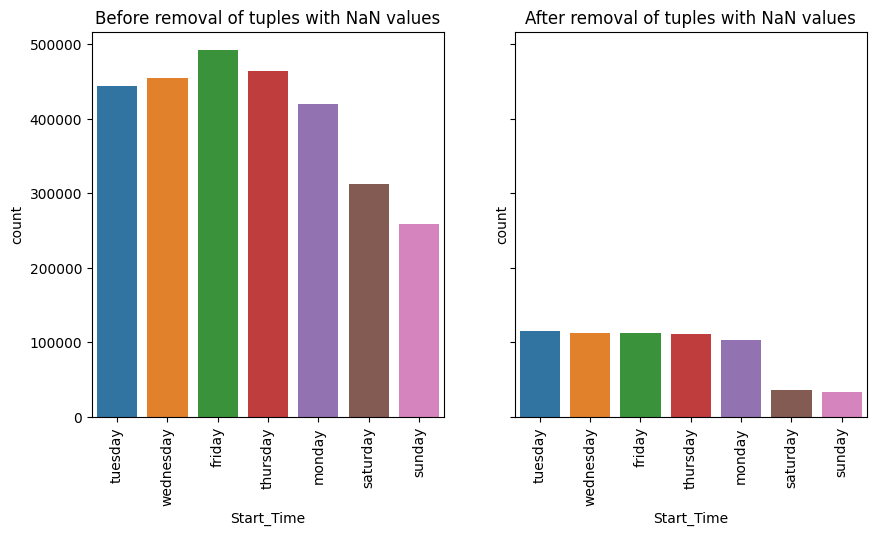

In [198]:
from matplotlib import pyplot as plt
import seaborn as sns

fig,axes = plt.subplots(1,2,figsize=(10,5),sharey = True)
sns.countplot(x='Start_Time',data = temp_df, ax = axes[0], order = accidents_copy['Start_Time'].value_counts().index)
axes[0].tick_params(axis = 'x',labelrotation=90)
axes[0].set_title('Before removal of tuples with NaN values')
sns.countplot(x='Start_Time',data = accidents_copy, ax = axes[1], order = accidents_copy['Start_Time'].value_counts().index)
axes[1].tick_params(axis = 'x',labelrotation=90)
axes[1].set_title('After removal of tuples with NaN values')

plt.show()

Checking for missing values in the features

In [199]:
accidents_copy.drop('Zipcode',axis = 1,inplace=True)
check = accidents_copy.isna().sum()

In [200]:
accidents_copy.isna().sum()

Severity                  0
Start_Time                0
Start_Lat                 0
Start_Lng                 0
End_Lat                   0
End_Lng                   0
Distance(mi)              0
Number               505269
Side                      0
Weather_Timestamp      9231
Temperature(F)        15420
Wind_Chill(F)        351617
Humidity(%)           16059
Pressure(in)          13027
Visibility(mi)        16547
Wind_Speed(mph)       82551
Precipitation(in)    385856
Weather_Condition     16736
Amenity                   0
Crossing                  0
Junction                  0
Railway                   0
Station                   0
Stop                      0
Traffic_Signal            0
Sunrise_Sunset           24
dtype: int64

In [201]:
columns_names = accidents_copy.columns.values.tolist()
na_columns = []

for index in range(len(check)):
    if check[index] != 0:
        na_columns.append(columns_names[index])

The names of the features that coontain null values are retrieved here and each of them is handled independently

In [202]:
print(na_columns)
len_na_columns = len(na_columns)
index_na_columns = 0
print(len_na_columns)


['Number', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset']
11


Some considerations on the column: Number is a numerical attribute and has we can see it has more than half of the value null. We could consider to replace the null values but the best alternative is to drop the column because it is useless in our problem: it just shows the street number. Weather_Timestamp is also irrelevant

In [203]:
accidents_final_df = accidents_copy
accidents_final_df.drop('Number',axis = 1,inplace=True)
accidents_final_df.drop('Weather_Timestamp',axis = 1,inplace=True)
index_na_columns += 2

In [204]:
accidents_final_df.shape

(622749, 24)

Here some features are renamed

In [205]:
accidents_final_df.rename(columns = {'Wind_Chill(F)':'Wind_Chill'}, inplace = True)
accidents_final_df.rename(columns = {'Pressure(in)':'Pressure'}, inplace = True)
accidents_final_df.rename(columns = {'Visibility(mi)':'Visibility'}, inplace = True)
accidents_final_df.rename(columns = {'Temperature(F)':'Temperature'}, inplace = True)
accidents_final_df.rename(columns = {'Wind_Speed(mph)':'Wind_Speed'}, inplace = True)
accidents_final_df.rename(columns = {'Precipitation(in)':'Precipitation'}, inplace = True)
accidents_final_df.rename(columns = {'Humidity(%)':'Humidity'}, inplace = True)



Here two methods are defined to check the null values of a feature

In [206]:
def examin_column_final(current_index):
    if current_index >= len_na_columns:
        return 
    column_name = na_columns[current_index]
    column_na_count = accidents_final_df[column_name].isna().sum()
    ratio = column_na_count/accidents_final_df.shape[0]
    print("Total count of null values for the column " + str(column_name) + " = " + str(column_na_count))
    print("Ratio between total number of values of the column respect to its null values = " + str(ratio))

def visualize_renamed_column(df,column):
    column_na_count = df[column].isna().sum()
    ratio = column_na_count/df.shape[0]
    print("Total count of null values for the column " + str(column) + " = " + str(column_na_count))
    print("Ratio between total number of values of the column respect to its null values = " + str(ratio))


Features where the rows are dropped

In [207]:
temp = accidents_final_df[accidents_final_df['Temperature'].isnull()]
index_array = temp.index
accidents_final_df.drop(index_array,axis = 0,inplace=True)

temp = accidents_final_df[accidents_final_df['Humidity'].isnull()]
index_array = temp.index
accidents_final_df.drop(index_array,axis = 0,inplace=True)

temp = accidents_final_df[accidents_final_df['Sunrise_Sunset'].isnull()]
index_array = temp.index
accidents_final_df.drop(index_array,axis = 0,inplace=True)


#examin_column_final(index_na_columns)
index_na_columns += 1

#examin_column_final(index_na_columns)
index_na_columns += 1

Text(0.5, 1.0, 'After removal of tuples with NaN values')

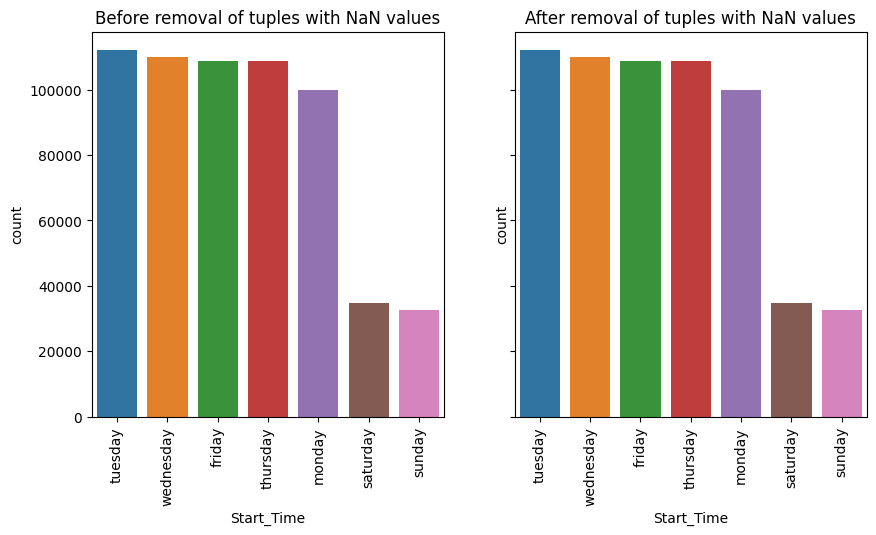

In [208]:
from matplotlib import pyplot as plt
import seaborn as sns

fig,axes = plt.subplots(1,2,figsize=(10,5),sharey = True)
sns.countplot(x='Start_Time',data = accidents_copy, ax = axes[0], order = accidents_final_df['Start_Time'].value_counts().index)
axes[0].tick_params(axis = 'x',labelrotation=90)
axes[0].set_title('Before removal of tuples with NaN values')
sns.countplot(x='Start_Time',data = accidents_final_df, ax = axes[1], order = accidents_final_df['Start_Time'].value_counts().index)
axes[1].tick_params(axis = 'x',labelrotation=90)
axes[1].set_title('After removal of tuples with NaN values')


In [209]:
accidents_final_df.shape

(606668, 24)

get_dummies() method for the categorical features

In [210]:
from datetime import datetime

for column in accidents_final_df.columns:
    if column in ['Start_Time']:
      dummies = pd.get_dummies(accidents_final_df[column],drop_first=False)
      accidents_final_df = pd.concat([accidents_final_df,dummies],axis=1)
      accidents_final_df.drop(column,axis=1,inplace=True)

accidents_final_df.to_csv('dataset/pre-processed_dataset_pre_dummies.csv')

print(accidents_final_df.Weather_Condition.mode()[0])
accidents_final_df['Weather_Condition'].fillna(accidents_final_df.Weather_Condition.mode()[0], inplace=True)

for column in accidents_final_df.columns:
    if column in ['Weather_Condition']:
      dummies = pd.get_dummies(accidents_final_df[column],drop_first=False)
      accidents_final_df = pd.concat([accidents_final_df,dummies],axis=1)
      accidents_final_df.drop(column,axis=1,inplace=True)


Clear


Split the dataset

In [211]:
from sklearn.model_selection import train_test_split


y = accidents_final_df['Severity']
X = accidents_final_df.drop('Severity',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [212]:
y_train.shape

(455001,)

handling the remaining null values of the features with mean or mode

In [213]:
def mean_mode_nan(df):

    index_na_columns = 2

    print(df.Wind_Chill.mean())
    df['Wind_Chill'].fillna(df.Wind_Chill.mean(),inplace= True)
    #examin_column_final(index_na_columns)

    #examin_column_final(index_na_columns)
    index_na_columns += 1

    #examin_column_final(index_na_columns)
    index_na_columns += 1

    print(df.Pressure.mean())
    df['Pressure'].fillna(df.Pressure.mean(),inplace= True)

    #examin_column_final(index_na_columns)
    index_na_columns += 1

    print(df.Visibility.mean())
    df['Visibility'].fillna(df.Visibility.mean(),inplace= True)

    #examin_column_final(index_na_columns)
    index_na_columns += 1

    print(df.Temperature.mean())
    df['Temperature'].fillna(df.Temperature.mean(),inplace= True)

    index_na_columns += 1
    #examin_column_final(index_na_columns)

    print(df.Wind_Speed.mean())
    df['Wind_Speed'].fillna(df.Wind_Speed.mean(),inplace= True)

    print(df.Precipitation.mean())
    df['Precipitation'].fillna(df.Precipitation.mean(),inplace= True)

    index_na_columns = 0

mean_mode_nan(accidents_final_df)
mean_mode_nan(X_train)
mean_mode_nan(X_test)

51.89178936409016
29.72655454027685
9.20220660453869
61.55497504401091
8.314594872157427
0.01850152696791451
51.90507052936426
29.726420525712186
9.202509924123305
61.57169171056768
8.307519865832752
0.01838563952199929
51.85202890002948
29.726956478681682
9.201296893239945
61.50482504434056
8.335810680117248
0.018848391047010003


In [214]:
visualize_renamed_column(accidents_final_df,'Temperature')
visualize_renamed_column(accidents_final_df,'Wind_Speed')
visualize_renamed_column(accidents_final_df,'Precipitation')
visualize_renamed_column(accidents_final_df,'Humidity')
visualize_renamed_column(accidents_final_df,'Visibility')

Total count of null values for the column Temperature = 0
Ratio between total number of values of the column respect to its null values = 0.0
Total count of null values for the column Wind_Speed = 0
Ratio between total number of values of the column respect to its null values = 0.0
Total count of null values for the column Precipitation = 0
Ratio between total number of values of the column respect to its null values = 0.0
Total count of null values for the column Humidity = 0
Ratio between total number of values of the column respect to its null values = 0.0
Total count of null values for the column Visibility = 0
Ratio between total number of values of the column respect to its null values = 0.0


In [215]:
X_train.isna().sum().sum()


0

In [216]:
X_train.shape
#y_train.shape

(455001, 124)

In [217]:
X_test.shape
y_test.shape

(151667,)

In [218]:
X_test.isna().sum().sum()

0

In [219]:
X_train.isna().sum()


Start_Lat             0
Start_Lng             0
End_Lat               0
End_Lng               0
Distance(mi)          0
                     ..
Tornado               0
Volcanic Ash          0
Widespread Dust       0
Wintry Mix            0
Wintry Mix / Windy    0
Length: 124, dtype: int64

In [220]:
X_test.isna().sum()


Start_Lat             0
Start_Lng             0
End_Lat               0
End_Lng               0
Distance(mi)          0
                     ..
Tornado               0
Volcanic Ash          0
Widespread Dust       0
Wintry Mix            0
Wintry Mix / Windy    0
Length: 124, dtype: int64

DIMENSIONALITY REDUCTION
Alcune feature non sono utili alla causa quindi le droppo

In [221]:
accidents_without_null = accidents_final_df.copy() 

In [222]:
accidents_without_null.tail(2)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,Temperature,Wind_Chill,Humidity,...,Thunder / Windy,Thunder and Hail / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Tornado,Volcanic Ash,Widespread Dust,Wintry Mix,Wintry Mix / Windy
2845340,0.0,33.99246,-118.40302,33.98311,-118.39565,0.772,R,71.0,71.0,81.0,...,0,0,0,0,0,0,0,0,0,0
2845341,0.0,34.13393,-117.23092,34.13736,-117.23934,0.537,R,79.0,79.0,47.0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
def examine_column_distribution(column):
    print("the feature " + str(column) + " is distributed this way: ")
    print(accidents_without_null[column].value_counts())


In [224]:
def convert_boolean_column_to_int(column,df):
    temp = list(map(int,df[column]))
    df[column] = temp

Mapping of the features 'Amenity','Crossing','Junction','Railway','Station','Stop','Traffic_Signal'

In [225]:
columns_to_convert = ['Amenity','Crossing','Junction','Railway','Station','Stop','Traffic_Signal']

for column_target in columns_to_convert:
    convert_boolean_column_to_int(column_target,accidents_without_null)
    convert_boolean_column_to_int(column_target,X_train)
    convert_boolean_column_to_int(column_target,X_test)

Mapping of the 'Sunrise_Sunset' feature

In [226]:
def day_night(record):
    if record == 'Night':
        return 0
    elif record == 'Day':
        return 1

temp = list(map(day_night,accidents_without_null['Sunrise_Sunset']))
accidents_without_null['Sunrise_Sunset'] = temp
temp = list(map(day_night,X_train['Sunrise_Sunset']))
X_train['Sunrise_Sunset'] = temp
temp = list(map(day_night,X_test['Sunrise_Sunset']))
X_test['Sunrise_Sunset'] = temp

Mapping of the 'Side' feature

In [227]:
def left_right(record):
    if record == 'L':
        return 0
    elif record == 'R':
        return 1

temp = list(map(left_right,accidents_without_null['Side']))
accidents_without_null['Side'] = temp
temp = list(map(left_right,X_train['Side']))
X_train['Side'] = temp
temp = list(map(left_right,X_test['Side']))
X_test['Side'] = temp

In [228]:
accidents_without_null.shape

(606668, 125)

In [229]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(151667,)

Picke module to save X_train,y_train,X_test,y_test

In [230]:
import pickle
 
class MyClass():
    def __init__(self, param):
        self.param = param
 
def save_object(obj,filename):
    try:
        with open(filename, "wb") as f:
            pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)
    except Exception as ex:
        print("Error during pickling object (Possibly unsupported):", ex)

save_object(X_train,"X_train.pickle")
save_object(X_test,"X_test.pickle")
save_object(y_train,"y_train.pickle")
save_object(y_test,"y_test.pickle")

In [231]:
accidents_without_null.to_csv('dataset/pre-processed_dataset_no_state.csv')